## Population and Sample

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Create a Population DataFrame with 10 data 

data = pd.DataFrame()
data['Population'] = [47, 48, 85, 20, 19, 13, 72, 16, 50, 60]

You may get different results from sampling.

In [4]:
# Draw sample with replacement, size=5 from Population

a_sample_with_replacement = data['Population'].sample(5, replace=True)
print(a_sample_with_replacement)

9    60
2    85
8    50
4    19
5    13
Name: Population, dtype: int64


In [5]:
# Draw sample without replacement, size=5 from Population

a_sample_without_replacement = data['Population'].sample(5, replace=False)
print(a_sample_without_replacement)

6    72
3    20
2    85
4    19
5    13
Name: Population, dtype: int64


# Parameters and Statistics

In [6]:
# Calculate mean and variance
population_mean = data['Population'].mean()
population_var = data['Population'].var(ddof=0)
print('Population mean is ', population_mean)
print('Population variance is', population_var)

Population mean is  43.0
Population variance is 571.8


**Expected Output: ** Population mean is  43.0
Population variance is 571.8


You may get different result from sampling.

In [7]:
# Calculate sample mean and sample standard deviation, size =10
# You will get different mean and varince every time when you excecute the below code

a_sample = data['Population'].sample(10, replace=True)
sample_mean = a_sample.mean()
sample_var = a_sample.var()
print('Sample mean is ', sample_mean)
print('Sample variance is', sample_var)

Sample mean is  25.0
Sample variance is 178.0


# Average of an unbiased estimator

In [8]:
sample_length = 500
sample_variance_collection=[data['Population'].sample(10, replace=True).var(ddof=1) for i in range(sample_length)]

# Variation of Sample

In [9]:
import pandas as pd
import numpy as np
from scipy.stats import norm
%matplotlib inline

In [10]:
# Sample mean and SD keep changing, but always within a certain range
Fstsample = pd.DataFrame(np.random.normal(10, 5, size=30))
print('sample mean is ', Fstsample[0].mean())
print('sample SD is ', Fstsample[0].std(ddof=1))

sample mean is  9.33256786078812
sample SD is  5.2380130425503175


## Empirical Distribution of mean

In [11]:
meanlist = []
for t in range(10000):
    sample = pd.DataFrame(np.random.normal(10, 5, size=30))
    meanlist.append(sample[0].mean())

In [12]:
collection = pd.DataFrame()
collection['meanlist'] = meanlist

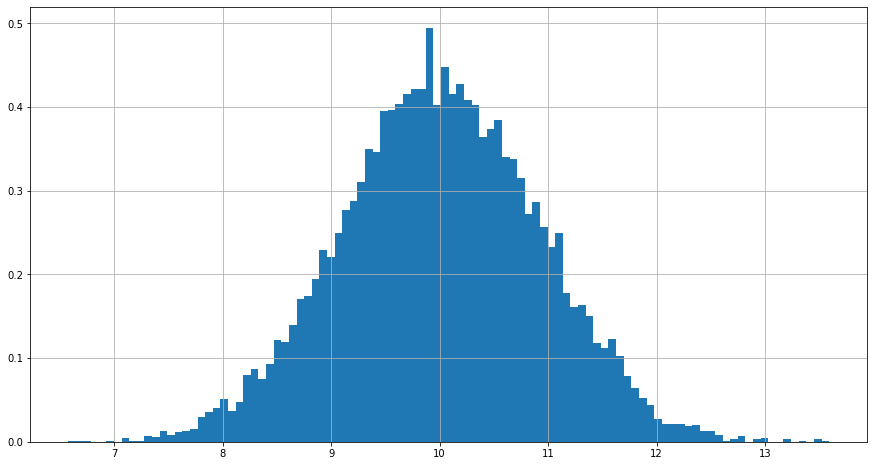

In [14]:
collection['meanlist'].hist(bins=100, normed=1,figsize=(15,8))

## Sampling from arbritary distribution

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd0a9b34320>]],
      dtype=object)

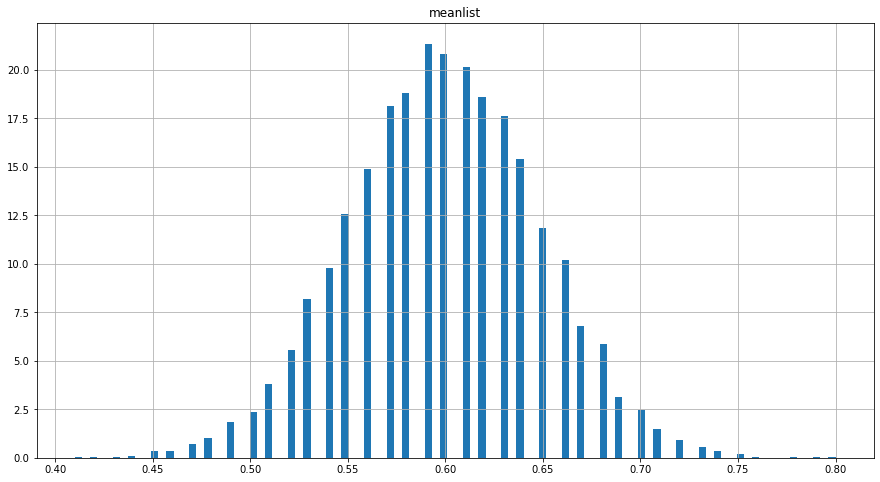

In [16]:
# See what central limit theorem tells you...the sample size is larger enough, 
# the distribution of sample mean is approximately normal
# apop is not normal, but try to change the sample size from 100 to a larger number. The distribution of sample mean of apop 
# becomes normal.
sample_size = 100
samplemeanlist = []
apop =  pd.DataFrame([1, 0, 1, 0, 1])
for t in range(10000):
    sample = apop[0].sample(sample_size, replace=True)  # small sample size
    samplemeanlist.append(sample.mean())

acollec = pd.DataFrame()
acollec['meanlist'] = samplemeanlist
acollec.hist(bins=100, normed=1,figsize=(15,8))

In [17]:
from scipy.stats import norm

In [22]:
ms = pd.read_csv('microsoft.csv',index_col = 0)
ms.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-12-31,46.730000,47.439999,46.450001,46.450001,42.848763,21552500
2015-01-02,46.660000,47.419998,46.540001,46.759998,43.134731,27913900
2015-01-05,46.369999,46.730000,46.250000,46.330002,42.738068,39673900
2015-01-06,46.380001,46.750000,45.540001,45.650002,42.110783,36447900
2015-01-07,45.980000,46.459999,45.490002,46.230000,42.645817,29114100


## Estimate the average stock return with 90% Confidence Interval

In [23]:
# we will use log return for average stock return of Microsoft

ms['logReturn'] = np.log(ms['Close'].shift(-1)) - np.log(ms['Close'])

In [25]:
# Lets build 90% confidence interval for log return
sample_size = ms['logReturn'].shape[0]
sample_mean = ms['logReturn'].mean()
sample_std = ms['logReturn'].std(ddof=1) / sample_size**0.5

# left and right quantile
z_left = norm.ppf(0.1)
z_right = norm.ppf(0.9)

# upper and lower bound
interval_left = sample_mean+z_left*sample_std
interval_right = sample_mean+z_right*sample_std

In [26]:
# 90% confidence interval tells you that there will be 90% chance that the average stock return lies between "interval_left"
# and "interval_right".

print('90% confidence interval is ', (interval_left, interval_right))

90% confidence interval is  (0.00016900921195778793, 0.0014714537602882566)


# Hypothesis testing

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

In [30]:
# import microsoft.csv, and add a new feature - logreturn
ms = pd.read_csv('microsoft.csv', index_col = 0)
ms['logReturn'] = np.log(ms['Close'].shift(-1)) - np.log(ms['Close'])

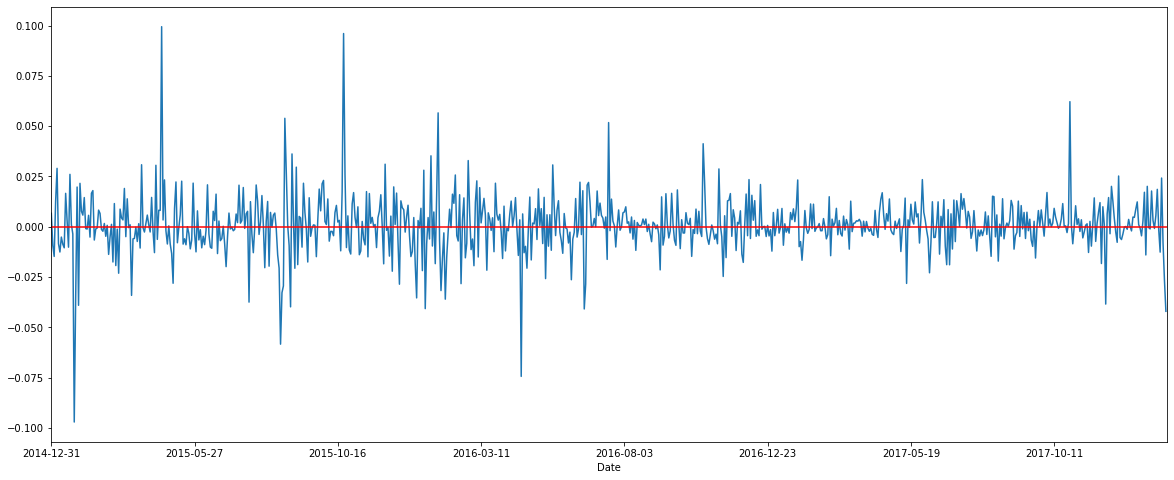

In [31]:
# Log return goes up and down during the period
ms['logReturn'].plot(figsize=(20, 8))
plt.axhline(0, color='red')
plt.show()

## Steps involved in testing a claim by hypothesis testing

### Step 1: Set hypothesis

$H_0 : \mu = 0$ 
$H_a : \mu \neq 0$

H0 means the average stock return is 0
H1 means the average stock return is not equal to 0

### Step 2: Calculate test statistic

In [34]:
sample_mean = ms['logReturn'].mean()
sample_std = ms['logReturn'].std(ddof=1)
n = ms['logReturn'].shape[0]

# if sample size n is large enough, we can use z-distribution, instead of t-distribtuion
# mu = 0 under the null hypothesis
zhat = (sample_mean - 0)/(sample_std/n**0.5)
print(zhat)

1.614147714000367


### Step 3: Set desicion criteria

In [35]:
# confidence level
alpha = 0.05

zleft = norm.ppf(alpha/2, 0, 1)
zright = -zleft  # z-distribution is symmetric 
print(zleft, zright)

-1.9599639845400545 1.9599639845400545


### Step 4:  Make decision - shall we reject H0?

In [36]:
print('At significant level of {}, shall we reject: {}'.format(alpha, zhat>zright or zhat<zleft))

At significant level of 0.05, shall we reject: False


## Try one tail test by yourself ! 

$H_0 : \mu \leq 0$ 
$H_a : \mu > 0$

In [37]:
# step 2
sample_mean = ms['logReturn'].mean()
sample_std = ms['logReturn'].std(ddof=1)
n = ms['logReturn'].shape[0]

# if sample size n is large enough, we can use z-distribution, instead of t-distribtuion
# mu = 0 under the null hypothesis
zhat = (sample_mean - 0)/(sample_std/n**0.5)
print(zhat)

1.614147714000367


In [38]:
# step 3
alpha = 0.05

zright = norm.ppf(1-alpha, 0, 1)
print(zright)

1.6448536269514722


In [39]:
# step 4
print('At significant level of {}, shall we reject: {}'.format(alpha, zhat>zright))

At significant level of 0.05, shall we reject: False


# An alternative method: p-value

In [40]:
# step 3 (p-value)
p = 1 - norm.cdf(zhat, 0, 1)
print(p)

0.053247694996968464


In [41]:
# step 4
print('At significant level of {}, shall we reject: {}'.format(alpha, p < alpha))

At significant level of 0.05, shall we reject: False
